In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

path = '../'
os.chdir(path)

### Load Data

In [2]:
df_train = pd.read_csv('data/BloodDonation_Train.csv')
df_test = pd.read_csv('data/BloodDonation_Test.csv')
df_sample_submit = pd.read_csv('data/BloodDonation_Sample_Submission.csv')

print("Training Data Dimension: ", df_train.shape) # (576, 6)
print("Testing Data Dimension: ", df_test.shape) # (200, 5)
print("Sample Submission Dimension: ", df_sample_submit.shape) # (200, 2)

Training Data Dimension:  (576, 6)
Testing Data Dimension:  (200, 5)
Sample Submission Dimension:  (200, 2)


In [3]:
# Prepare merge index
train_end_index = df_train.shape[0] - 1
test_start_index = df_test.shape[0] + 1
print(train_end_index)
print(test_start_index)

575
201


In [3]:
df_train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
df_test.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
195,103,16,1,250,16
196,224,21,2,500,23
197,454,23,8,2000,46
198,585,23,2,500,28
199,154,4,11,2750,64


In [6]:
# Merging the training and testing data into one
df_data_raw = pd.concat([df_train, df_test], sort=False, ignore_index=True)
cols = df_data_raw.columns.tolist()
cols = cols[0:1] + cols[-1:] + cols[1:-1]
df_data_raw = df_data_raw[cols]
print("Merged data set dimension: ", df_data_raw.shape)
df_data_raw.sample(10)

Merged data set dimension:  (776, 6)


,Unnamed: 0,Made Donation in March 2007,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
612,508,NaN,2,2,500,41
105,145,1.0,2,2,500,10
650,657,NaN,23,4,1000,52
90,493,1.0,4,8,2000,40
697,537,NaN,4,9,2250,26
759,691,NaN,16,1,250,16
76,311,0.0,4,2,500,4
571,698,0.0,23,1,250,23
445,640,0.0,2,1,250,2
347,27,0.0,21,1,250,21


In [7]:
# Useful small code for checking if any data is missing
def missing_count(df):
    m = df.isna().sum()
    m = m[m != 0]
    print(m)

missing_count(df_data_raw) # missing value count for raw total

Made Donation in March 2007    200
dtype: int64


Text(0,0.5,'Made Donation in March 2007')

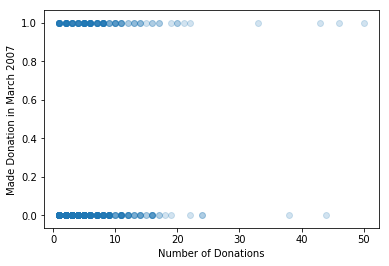

In [8]:
df_check = df_data_raw.iloc[0:train_end_index] # only use training data since it has SalePrice
FeatureX = 'Number of Donations'
FeatureY = 'Made Donation in March 2007'
plt.scatter(df_check[FeatureX], df_check[FeatureY], alpha=0.2)
plt.xlabel(FeatureX)
plt.ylabel(FeatureY)

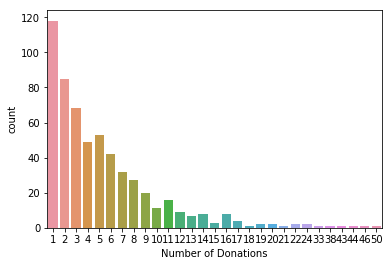

In [13]:
# ax = sns.countplot(x=cols[1], data=df_train)
ax = sns.countplot(x=cols[3], data=df_train)

D:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Programs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Programs\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Programs\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


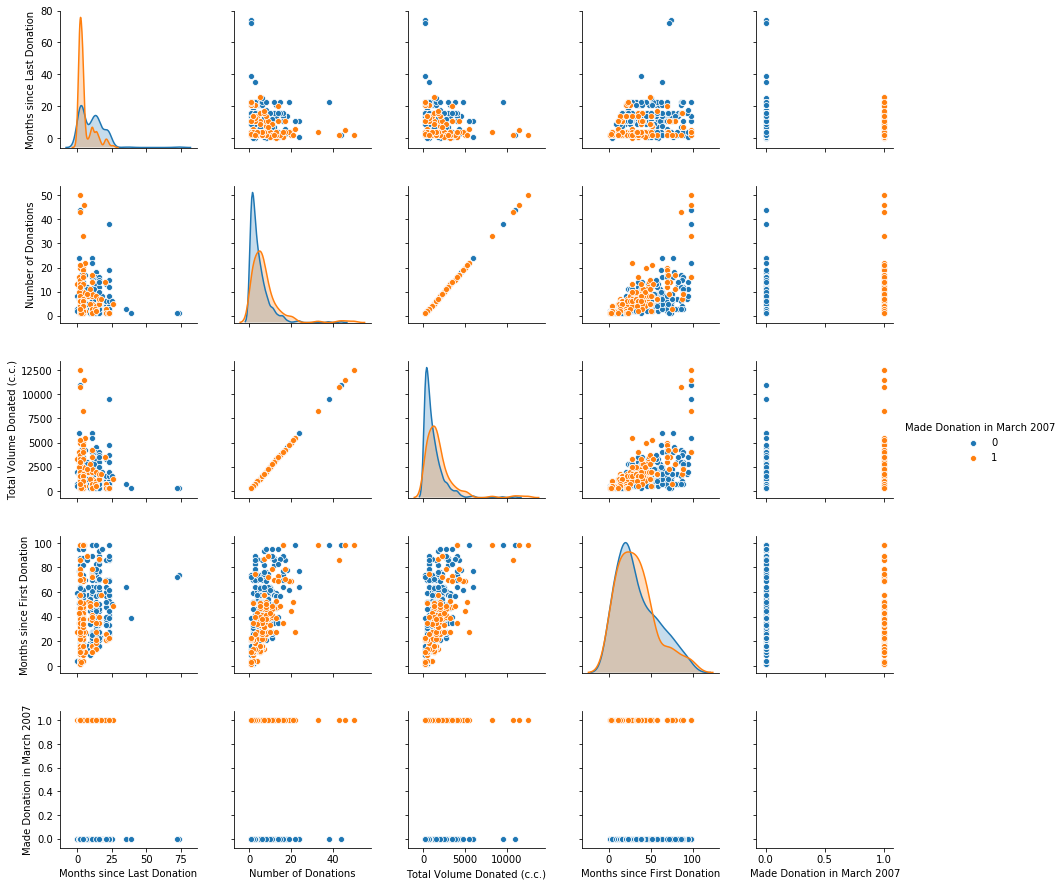

In [12]:
# sns.pairplot(df_train.drop(['Unnamed: 0'], axis = 1), hue='Made Donation in March 2007')
sns.pairplot(df_train.iloc[:,1:], hue='Made Donation in March 2007')

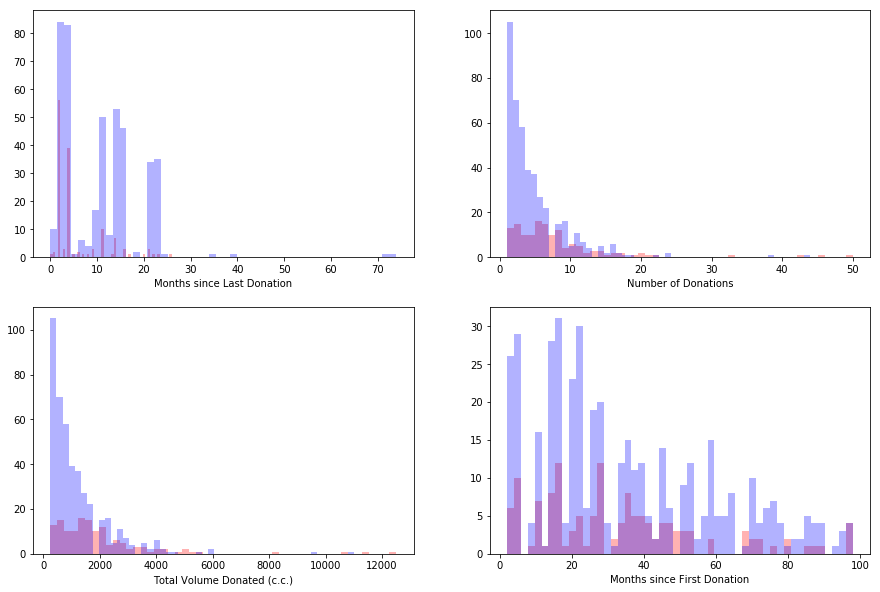

In [23]:
fig,ax = plt.subplots(2,2, figsize=(15,10))

for i in range(0,2):
    for j in range(0,2):
        col_name = df_train.columns[2*i+1*j+1]
        ax[i,j].hist(df_train[df_train['Made Donation in March 2007'] == 1][col_name], bins = 50, color = 'red', alpha = 0.3)
        ax[i,j].hist(df_train[df_train['Made Donation in March 2007'] == 0][col_name], bins = 50, color = 'blue', alpha = 0.3)
        ax[i,j].set_xlabel(col_name)

In [29]:
df_train[df_train['Made Donation in March 2007'] == 0].count()/df_train[df_train['Made Donation in March 2007'] == 1].count()

Unnamed: 0                     3.173913
Months since Last Donation     3.173913
Number of Donations            3.173913
Total Volume Donated (c.c.)    3.173913
Months since First Donation    3.173913
Made Donation in March 2007    3.173913
dtype: float64